In [1]:
pip install ucimlrepo

In [2]:
# -----------------------------
# 0. Importing All Libraries
# -----------------------------
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt




In [3]:
# -----------------------------
# 1. Fetch Ionosphere dataset using ucimlrepo
# -----------------------------
ionosphere = fetch_ucirepo(id=52)

# Features and targets
X = ionosphere.data.features
y = ionosphere.data.targets

# Convert labels to binary: 'g' -> 1, 'b' -> 0
y = np.where(y == 'g', 1, 0)

# Optional: print metadata and variable info
print(ionosphere.metadata)
print(ionosphere.variables)


{'uci_id': 52, 'name': 'Ionosphere', 'repository_url': 'https://archive.ics.uci.edu/dataset/52/ionosphere', 'data_url': 'https://archive.ics.uci.edu/static/public/52/data.csv', 'abstract': 'Classification of radar returns from the ionosphere', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 351, 'num_features': 34, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 01 1989', 'dataset_doi': '10.24432/C5W01B', 'creators': ['V. Sigillito', 'S. Wing', 'L. Hutton', 'K. Baker'], 'intro_paper': None, 'additional_info': {'summary': 'This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  

In [4]:
# -----------------------------
# 2. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# -----------------------------
# 3. Helper function
# -----------------------------
def evaluate_perceptron(X_train, y_train, X_test, y_test, alpha=None):
    model = Perceptron(
        penalty='l2' if alpha else None,
        alpha=alpha if alpha else 0.0001,
        max_iter=1000,
        random_state=42
    )
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    return train_acc, test_acc

In [6]:
# -----------------------------
# 4. Full Training Set Results
# -----------------------------
full_no_reg = evaluate_perceptron(X_train_scaled, y_train, X_test_scaled, y_test, alpha=None)
full_reg = evaluate_perceptron(X_train_scaled, y_train, X_test_scaled, y_test, alpha=0.01)

print("Full Training Set Results:")
print(f"No Regularization -> Train: {full_no_reg[0]:.3f}, Test: {full_no_reg[1]:.3f}")
print(f"With Regularization -> Train: {full_reg[0]:.3f}, Test: {full_reg[1]:.3f}\n")

Full Training Set Results:
No Regularization -> Train: 0.931, Test: 0.906
With Regularization -> Train: 0.755, Test: 0.811



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
# -----------------------------
# 5. Smaller Subsets
# -----------------------------
subset_sizes = [50, 100, 200]
results = []

for size in subset_sizes:
    idx = np.random.choice(len(X_train_scaled), size=size, replace=False)
    X_sub, y_sub = X_train_scaled[idx], y_train[idx]
    no_reg = evaluate_perceptron(X_sub, y_sub, X_test_scaled, y_test, alpha=None)
    reg = evaluate_perceptron(X_sub, y_sub, X_test_scaled, y_test, alpha=0.01)
    results.append((size, no_reg[0], no_reg[1], reg[0], reg[1]))

summary = pd.DataFrame(results, columns=[
    'Subset Size', 'Train Acc (No Reg)', 'Test Acc (No Reg)', 'Train Acc (Reg)', 'Test Acc (Reg)'
])

print("Subset Results:")
print(summary)

Subset Results:
   Subset Size  Train Acc (No Reg)  Test Acc (No Reg)  Train Acc (Reg)  \
0           50               1.000           0.849057             0.92   
1          100               0.990           0.849057             0.92   
2          200               0.935           0.867925             0.74   

   Test Acc (Reg)  
0        0.754717  
1        0.830189  
2        0.792453  


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

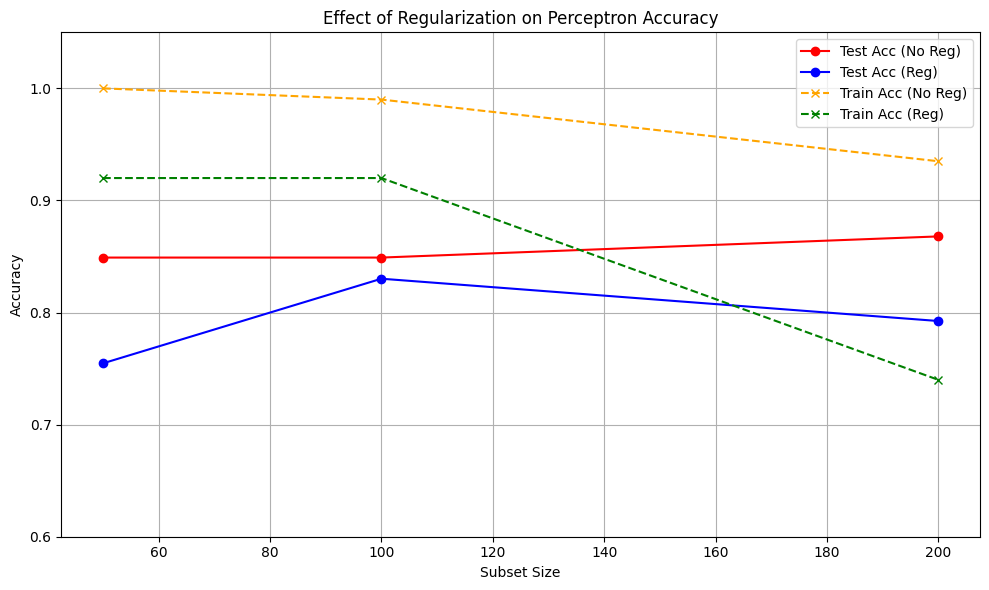

In [8]:
# -----------------------------
# 6. Visualization
# -----------------------------
plt.figure(figsize=(10, 6))

# Test Accuracy comparison
plt.plot(summary['Subset Size'], summary['Test Acc (No Reg)'], marker='o', label='Test Acc (No Reg)', color='red')
plt.plot(summary['Subset Size'], summary['Test Acc (Reg)'], marker='o', label='Test Acc (Reg)', color='blue')

# Train Accuracy comparison
plt.plot(summary['Subset Size'], summary['Train Acc (No Reg)'], marker='x', linestyle='--', label='Train Acc (No Reg)', color='orange')
plt.plot(summary['Subset Size'], summary['Train Acc (Reg)'], marker='x', linestyle='--', label='Train Acc (Reg)', color='green')

plt.title('Effect of Regularization on Perceptron Accuracy')
plt.xlabel('Subset Size')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()